In [1]:
import os
import sys
import numpy as np
import torch
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append("../authorship_attribution/")
sys.path.append("../obfuscated_ast_similarity//")

In [3]:
import model as ast_model
import train as ast_train
import utilities as ast_utilities
import obfuscation
import json
import obfuscated_trainer

In [4]:
original_path = "../authorship_attribution/experiments/GCJ-108/plain/"

In [5]:
# complete_model = ast_utilities.load_plain_model(complete_model, )
# model_params = json.loads(open(os.path.join(path, "components", "ast_encoder_params.json")).read())
model_params = json.loads(open(os.path.join(original_path, "best_state", "components", "ast_encoder_params.json")).read())


In [6]:
ast_encoder = ast_model.ASTEncoder(model_params)
ast_encoder.load(os.path.join(original_path, "best_state", "components"))

In [7]:
batcher = obfuscated_trainer.Batcher({}, 0.8)
batcher.load_from_attribution_batcher(original_path)
# batcher.load_from_attribution_batcher("../authorship_attribution/experiments/GCJ-108/regularized-sep-coef-names/")
# batcher.load(original_path)

In [8]:
# batcher.train_data

In [9]:
# data = ast_utilities.read_all_gcj()

In [10]:
# data = ast_utilities.filter_by_count(data, 15, 1000)
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [11]:
# obfuscation_params = {
#     'add_kvargs':0.5,
#     'add_args':0.5,
#     'args_max_add':5,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.5,
#     'modify_body':0.5,
#     'n_modification_depth':3,
#     'max_trash_to_body':3,
#     'swap_in_body':0.5
# }

# obfuscation_params = {
#     'add_kvargs':0.8,
#     'add_args':0.8,
#     'args_max_add':8,
#     'add_call_args':0.8,
#     'call_args':5,
#     'call_kwargs':5,
#     'if_swap':0.7,
#     'modify_body':0.7,
#     'n_modification_depth':5,
#     'max_trash_to_body':5,
#     'swap_in_body':0.6
# }

# obfuscation_params = {
#     'add_kvargs':0.3,
#     'add_args':0.3,
#     'args_max_add':3,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.4,
#     'modify_body':0.4,
#     'n_modification_depth':2,
#     'max_trash_to_body':5,
#     'swap_in_body':0.5
# }

obfuscation_params = {
    'add_kvargs':0.3,
    'add_args':0.3,
    'args_max_add':10,
    'add_call_args':0.5,
    'call_args':10,
    'call_kwargs':10,
    'if_swap':0.5,
    'modify_body':0.4,
    'n_modification_depth':3,
    'max_trash_to_body':5,
    'swap_in_body':0.5
}


# obfuscation_params = {
#     'add_kvargs':0.0,
#     'add_args':0.0,
#     'args_max_add':0,
#     'add_call_args':0.0,
#     'call_args':0,
#     'call_kwargs':0,
#     'if_swap':0.0,
#     'modify_body':0.0,
#     'n_modification_depth':0,
#     'max_trash_to_body':0,
#     'swap_in_body':0.0
# }



In [12]:
long_names = obfuscated_trainer.order_names_by_count(batcher)

Train:
0.6148148148148147
0.5580246913580246
0.7685185185185186


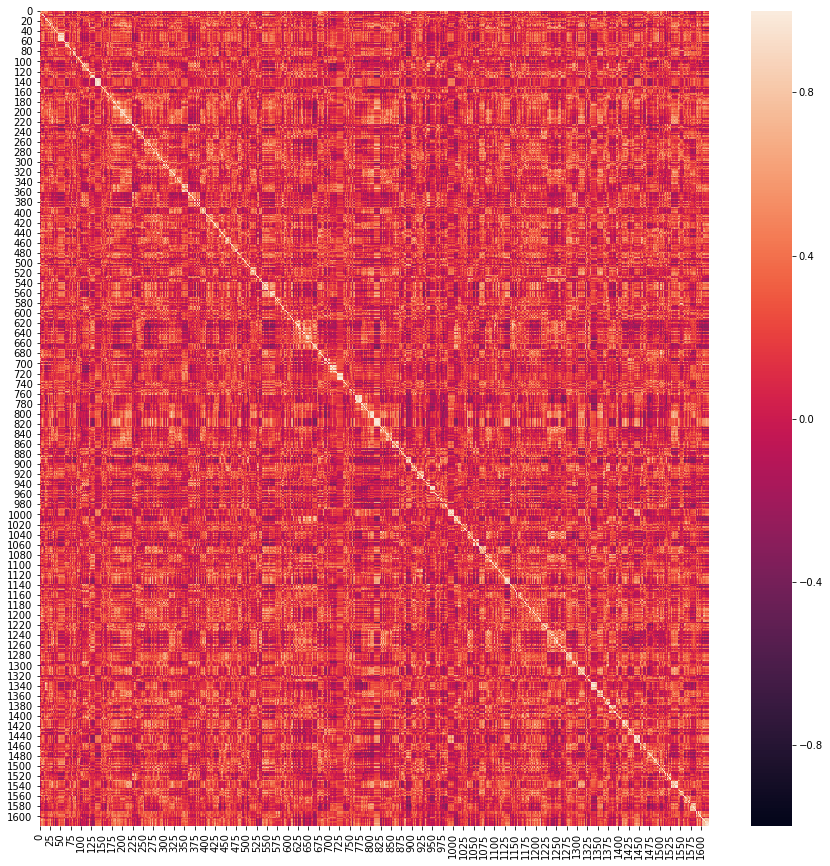

Test:
0.6867283950617283
0.5916152263374486
0.7358024691358026


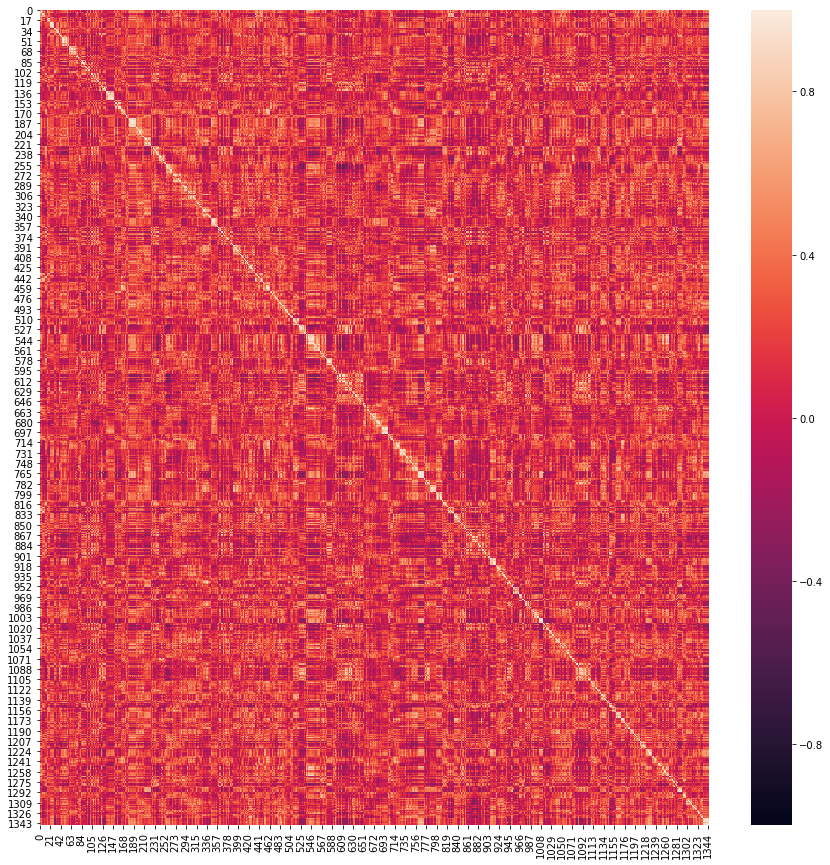

In [13]:
sim = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, n_first_for_person=5, n_obfuscated=2)

In [18]:
np.abs(sim - sim.T).max()

1.1920929e-07

In [13]:

# trainer_params = dict(
#     n_epochs = 200,
#     n_obfuscated = 25,
#     validate_every = 5,
#     n_problems_validation = 50,
#     validate_n_problems = 50,
#     train_n_problems = 50,
#     regularizer_coef = 0.001,
#     n_adversarial = 100,
#     adversarial_coef = 1
# )


trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 25,
    validate_every = 5,
    n_problems_validation = 50,
    validate_n_problems = 10,
    train_n_problems = 10,
    regularizer_coef = 0.000,
    n_adversarial = 10,
    adversarial_coef = 1
)


In [14]:
track_metric = {
    "metric_name":"loss",
    "function":ast_train.validate_max
}

In [15]:
# batcher = obfuscated_trainer.Batcher(data, 0.8)
!ls

Anytask-on-GCJ-108.ipynb   most_common_names_all_datasets.pkl
experiments		   obfuscated_trainer.py
GCJ-108.ipynb		   obfuscation.py
GCJ-108-mixing-code.ipynb  __pycache__
GCJ-108-names.ipynb	   training_obfuscated_ast_discriminator.ipynb
mix_code.ipynb


In [16]:
path = "./experiments/gcj_108_108/pure/no_names"
if os.path.exists(path):
    raise ValueError()

ValueError: 

In [17]:
trainer = obfuscated_trainer.Trainer(ast_encoder, torch.optim.Adam(ast_encoder.parameters()), path=path, track_metric=track_metric)

In [18]:
trainer.load(os.path.join(path, "last_state"))

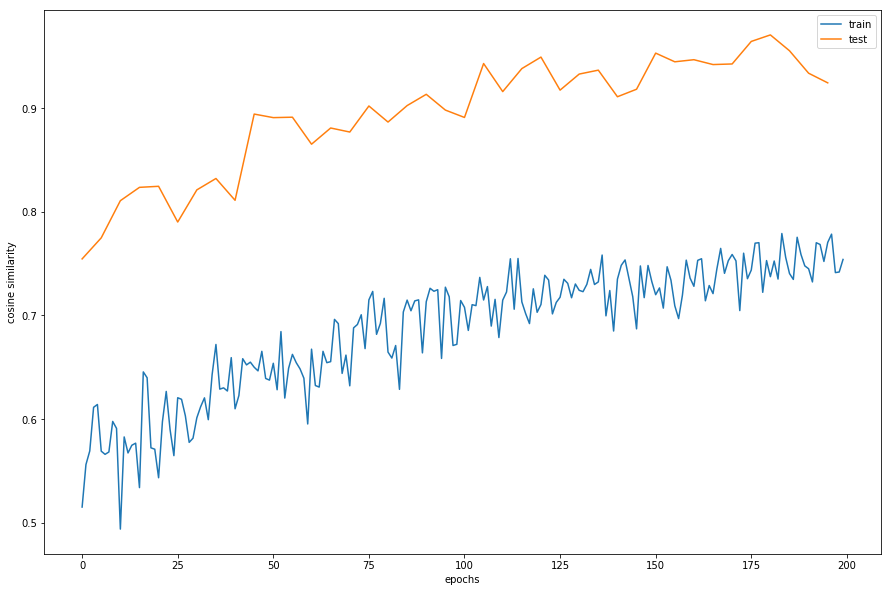

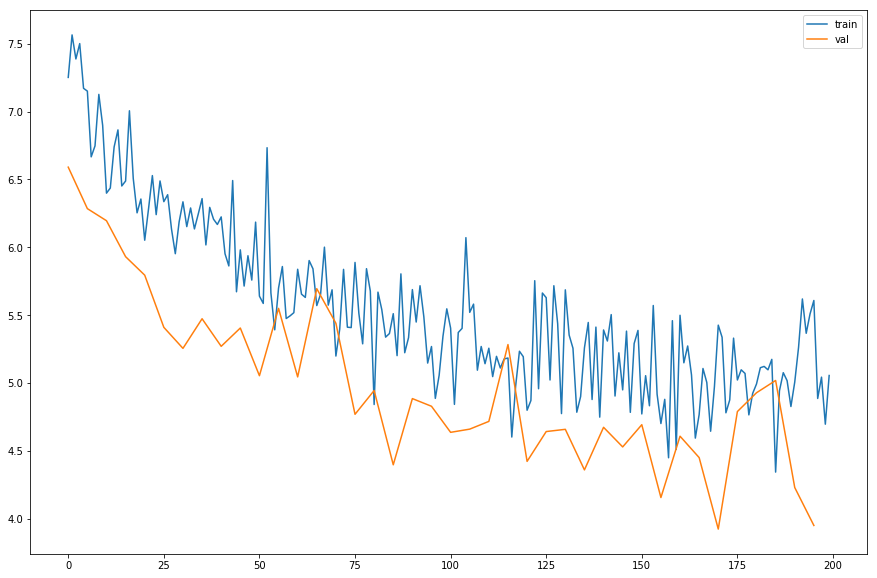

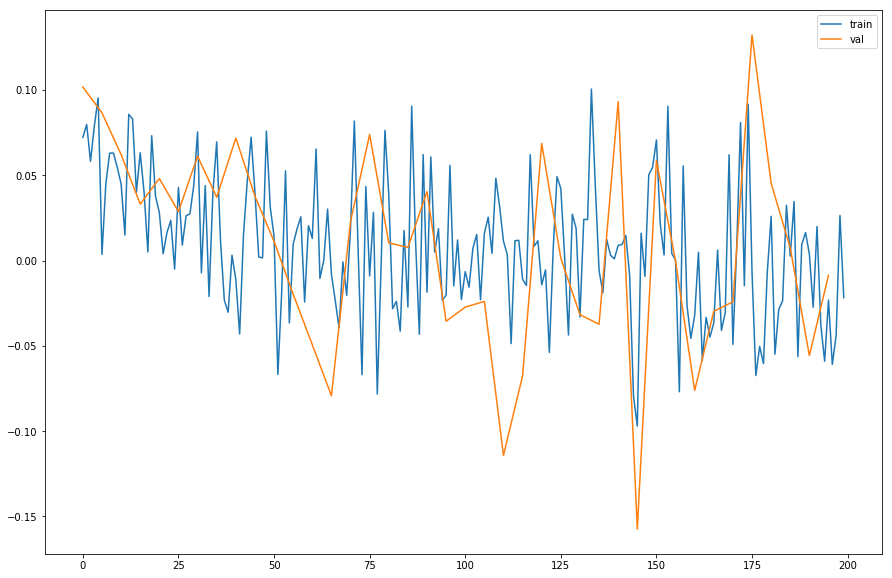

In [19]:
trainer.train(batcher, trainer_params, obfuscation_params)

Test:
0.8657407407407407
0.7777777777777779
0.8055555555555556


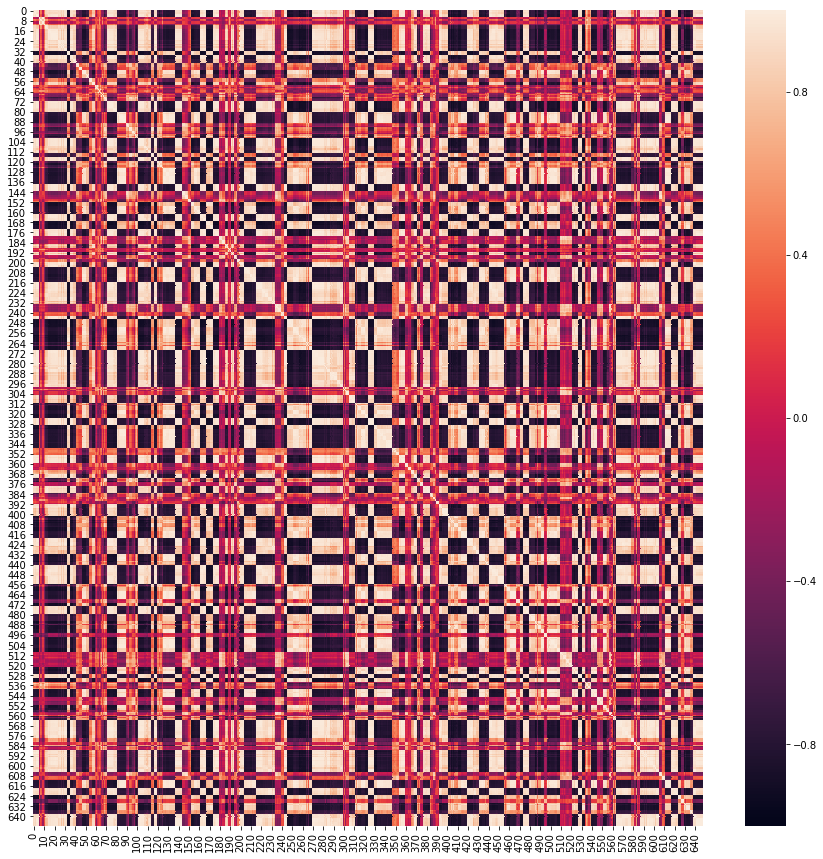

In [38]:
sim = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, n_first_for_person=2, n_obfuscated=2)

In [40]:
# res = sim
sim = res[0]

In [41]:
np.abs(sim - sim.T).max()

1.1920929e-07

In [42]:
cur = sim[592]

In [43]:
asort = np.argsort(cur)

In [47]:
asort

array([258, 405, 531, 330, 332, 532, 170, 486, 168, 413, 533, 412, 411,
       402, 407, 624, 246, 247, 248, 626, 630, 471, 260, 509, 507, 250,
       508, 625, 259, 460, 473, 438, 461, 251,  35, 322, 169, 249,  33,
        34, 331, 263, 459, 269, 632, 472, 312, 261, 267, 321, 323, 268,
       489, 490, 491, 635, 633, 262, 524, 634, 172, 153, 154, 171, 173,
       155, 403, 122, 315, 317, 433, 408, 316, 409, 434, 432, 553, 552,
       555, 131, 499, 211, 210, 130, 129, 542, 540,  50,  48, 541, 100,
       492, 493, 501, 503, 502, 527,  49, 554, 406, 336, 487, 156, 613,
       206, 204, 544, 543, 346, 523, 522, 205, 525, 526, 314, 342, 344,
       612, 614, 257, 500, 345, 347, 157, 435, 436, 255, 256, 126, 213,
       132, 133, 466, 465, 160, 161, 616, 615, 127, 159, 252,  87, 545,
       504, 135, 339, 136, 209, 410, 437, 134, 340, 318, 333, 341, 334,
        88,  86,  84, 498, 320, 137, 265, 207, 208, 338, 456, 335, 463,
       464, 462,  85,  89, 214, 337, 319, 417, 418, 414, 458, 46

In [44]:
cur[asort]

array([-0.9172924 , -0.9077914 , -0.9039178 , -0.9023506 , -0.9023506 ,
       -0.9014356 , -0.9009547 , -0.89687884, -0.89641654, -0.89514655,
       -0.89318573, -0.89003587, -0.89003587, -0.88984215, -0.8896153 ,
       -0.8889948 , -0.8889407 , -0.8889407 , -0.8889407 , -0.88830394,
       -0.88716286, -0.88531405, -0.88380814, -0.8834097 , -0.8834097 ,
       -0.88290787, -0.88277966, -0.8822261 , -0.88103485, -0.88044727,
       -0.8803638 , -0.8796027 , -0.8795074 , -0.8789015 , -0.87884635,
       -0.8785795 , -0.8781088 , -0.87807894, -0.8779435 , -0.8779435 ,
       -0.87566215, -0.8745016 , -0.87049186, -0.870348  , -0.87020326,
       -0.86988497, -0.8698786 , -0.86962616, -0.8695661 , -0.86855817,
       -0.86855817, -0.8676686 , -0.86613786, -0.86613786, -0.86613786,
       -0.8660687 , -0.8658749 , -0.8647263 , -0.8640756 , -0.86392486,
       -0.85909307, -0.8589493 , -0.8589493 , -0.85866606, -0.85866606,
       -0.85034084, -0.84966654, -0.8489398 , -0.8488062 , -0.84

In [45]:
cur[asort[-100:]]

array([0.9536392 , 0.95474946, 0.95474946, 0.95479596, 0.95496386,
       0.9554789 , 0.9563788 , 0.95645785, 0.9566313 , 0.95686394,
       0.9576272 , 0.9582943 , 0.9584016 , 0.9584016 , 0.9584749 ,
       0.95872635, 0.95914525, 0.9601654 , 0.9606303 , 0.9611307 ,
       0.9611307 , 0.9616688 , 0.96194166, 0.96194166, 0.9626652 ,
       0.96374035, 0.96374035, 0.96416444, 0.9648553 , 0.9648553 ,
       0.9648554 , 0.9648591 , 0.9648591 , 0.96503055, 0.96503055,
       0.96510315, 0.96648586, 0.9672816 , 0.9674773 , 0.9674773 ,
       0.96750027, 0.96750027, 0.96750027, 0.9677897 , 0.9681725 ,
       0.9684618 , 0.9684618 , 0.9684618 , 0.9689616 , 0.96915066,
       0.9694283 , 0.97019374, 0.97019374, 0.97045803, 0.9705354 ,
       0.9705354 , 0.97064936, 0.970688  , 0.97133964, 0.97162205,
       0.97170895, 0.9732521 , 0.97351277, 0.97351277, 0.9737855 ,
       0.9741498 , 0.974314  , 0.9747502 , 0.97480536, 0.97480536,
       0.9753897 , 0.975409  , 0.97574073, 0.9769089 , 0.97719

In [51]:
import astor

In [61]:
asort[-20:]

array([442, 595, 594,   5, 357, 359, 354, 279, 280, 281, 369, 276, 277,
       588, 278, 356, 358,   3, 590, 592])

In [60]:
for index in reversed(asort[-10:]):
    print("Similarity", cur[index])
    try:
        print(astor.to_source(res[-1][index]))
    except:
        print(res[-1][index])
    
    print("\t\t````````````````````````")

Similarity 1.0000001
welcome = 'welcome to code jam'
string = ''
import no_import
memoize = {}


def count(pos, wi):
    if (pos, wi) in memoize:
        return memoize[pos, wi]
    total = sum(count(i, wi - 1) for i in range(pos) if string[i] ==
        welcome[wi - 1])
    memoize[pos, wi] = total % 10000
    return total % 10000


def trash():
    pass


def solve(paragraph):
    global string, memoize
    string = paragraph
    memoize = {}
    for i in range(len(welcome)):
        memoize[0, i + 1] = 0
    for i in range(len(string)):
        memoize[i + 1, 1] = string[:i + 1].count('w')
    return str(count(len(string), len(welcome))).rjust(4, '0')


def main():
    file = open('input.in')
    tests = int(file.readline().strip())
    for case in range(1, tests + 1):
        paragraph = file.readline().strip()
        print('Case #', case, ': ', solve(paragraph), sep='')


import no_import
if __name__ == '__main__':
    main()

		````````````````````````
Similarity 0.9877015
pass


from sys import stdin, stdout, stderr
phrase = 'welcome to code jam'


def solve_case(text):
    ans = [([0] * (len(text) + 1)) for i in range(len(phrase) + 1)]
    for i in range(len(text) + 1):
        ans[-1][i] = 1
    for i, c in reversed(list(enumerate(phrase))):
        for j, d in reversed(list(enumerate(text))):
            if d == c:
                ans[i][j] = ans[i][j + 1] + ans[i + 1][j + 1]
            else:
                ans[i][j] = ans[i][j + 1]
    return ans[0][0]


def read_case():
    return input()


def print_case(i, ans):
    s = 'Case #%d: %s' % (i, ('%4d' % ans).replace(' ', '0'))
    print(s)


def main():
    for i in range(1, int(input()) + 1):
        print_case(i, solve_case(read_case()))


if __name__ == '__main__':
    main()



In [26]:
import gc
gc.collect()

71

In [38]:
batcher.train_data['201000'][0]

In [ ]:
result = obfuscated_trainer.compare_cos(ast_encoder, batcher.test_data, np.mean)